In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import os

In [2]:
df = pd.read_csv('bubble_out.csv')
df = df.iloc[: , :-1]
runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5']
df[runs] = df[runs]/1000000
df['average'] = df[runs].mean(axis=1)
middle = int(len(df)/2)
partitions = 2
branched, predicated = np.array_split(df, partitions)

In [3]:
datasets = {
  'l_extendedprice-int32.csv': [],
  'l_orderkey-int32.csv': [],
  'l_tax-int8.csv': []
}

In [4]:
for key, grp in df.groupby(['Type','File']):
  datasets[key[1]].append(grp)

In [5]:
df_extended = pd.concat(datasets['l_extendedprice-int32.csv'])
df_orderkey = pd.concat(datasets['l_orderkey-int32.csv'])
df_tax = pd.concat(datasets['l_tax-int8.csv'])
dfs = [df_extended, df_orderkey, df_tax]

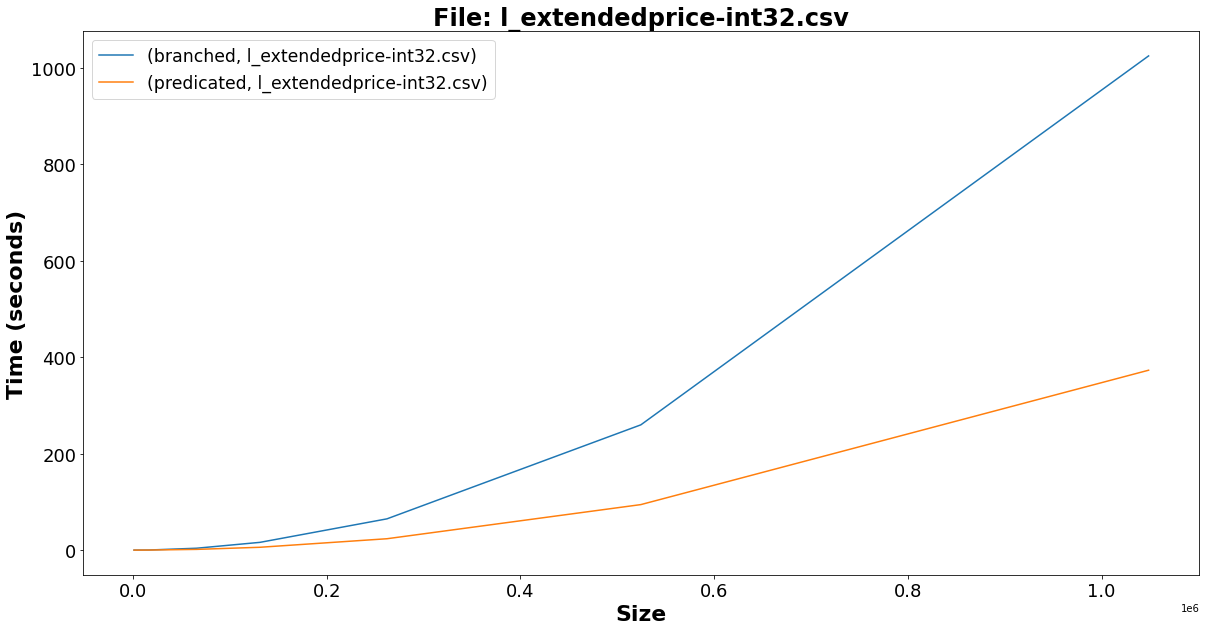

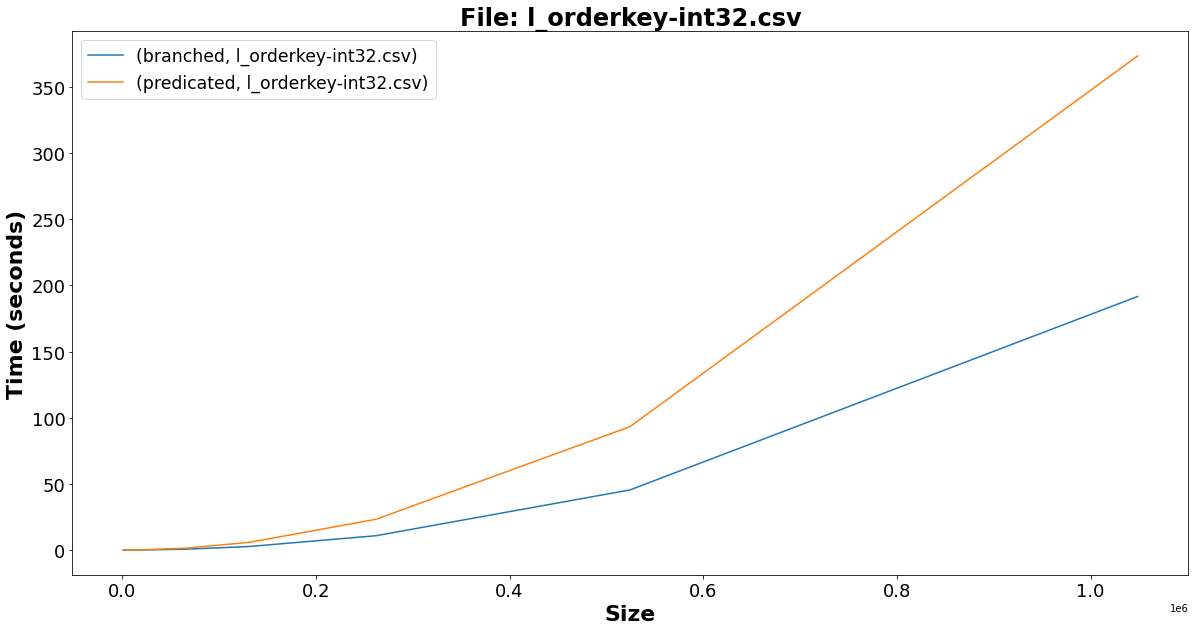

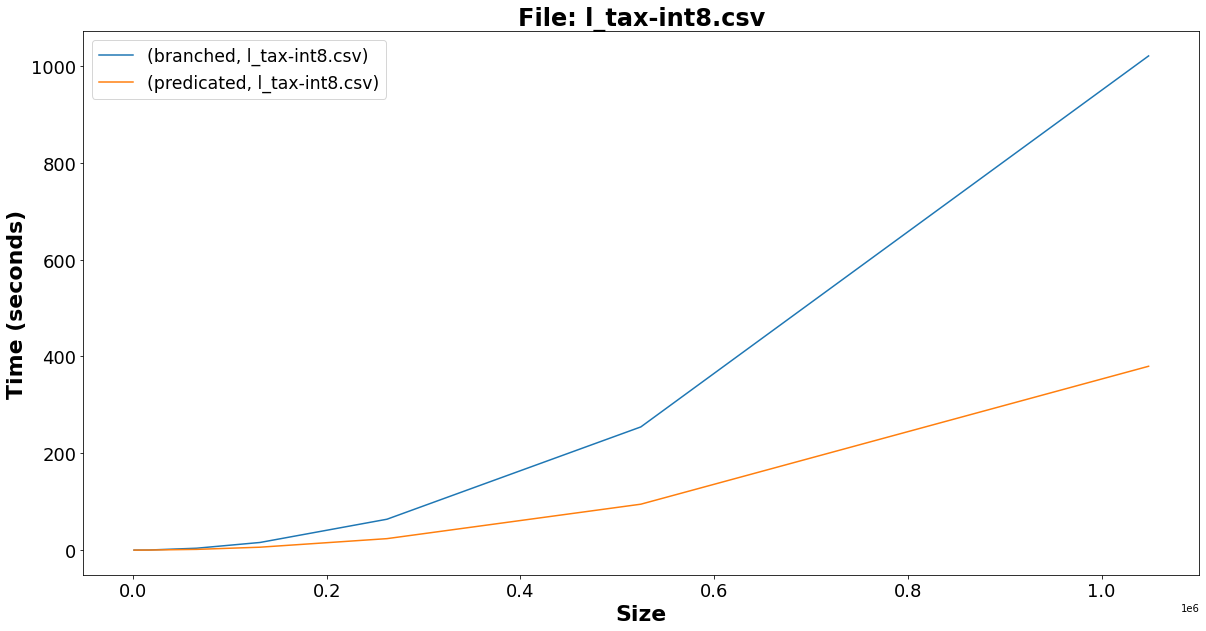

In [6]:
for df_plot, title in zip(dfs, datasets.keys()):
  fig, ax = plt.subplots()
  df_plot.set_index('Size', inplace=True)
  df_plot.groupby(['Type','File'])['average'].plot(figsize=(20,10),ax=ax)
  ax.set_xlabel('Size', fontsize=22, fontweight='bold')
  ax.set_ylabel('Time (seconds)', fontsize=22, fontweight='bold')
  ax.set_title(f'File: {title}', fontsize=24, fontweight='bold')

  handles, labels = ax.get_legend_handles_labels()
  # Set tick font size
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(18)
  plt.legend(labels, fontsize='xx-large')
  fig.savefig(f'figures/bubble_{title}.png', dpi=400)